In [56]:
from mpl_toolkits.mplot3d import Axes3D
from skimage.color        import rgb2grey

In [61]:
import numpy             as np
import matplotlib.pyplot as plt
%matplotlib inline

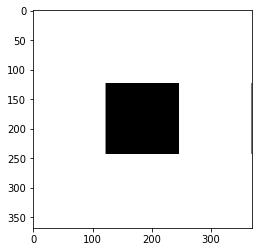

In [7]:
im = plt.imread('../../images/Chess_Board.png')
implot = plt.imshow(im)
#plt.show()

In [9]:
im.shape

(368, 370, 3)

(368, 370)


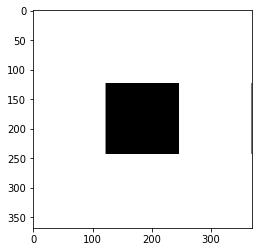

In [16]:
im_g = rgb2grey(im)
print( im_g.shape )
implot = plt.imshow(im)

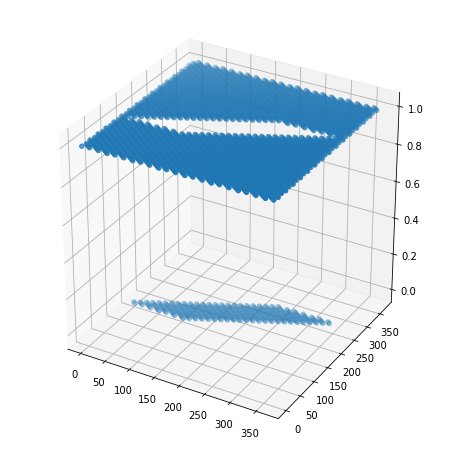

In [67]:
x,y  = im_g.shape[0],im_g.shape[1]
mesh = np.meshgrid(np.arange(x),np.arange(y) )

ax = plt.figure(figsize=(8,8)).add_subplot(111, projection='3d');

ax.scatter( mesh[0].flatten().astype('float')[::50], 
            mesh[1].flatten().astype('float')[::50], 
            im_g.flatten()[::50] )

ax.set_aspect('equal')

In [72]:
from skimage.filters.rank import entropy
from skimage.morphology   import disk

In [238]:
n     = 21
im_en = entropy(im_g.astype('uint16'), disk(n))

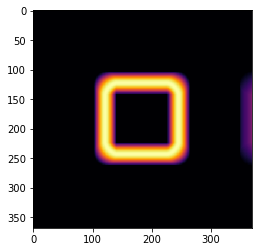

In [230]:
plt.imshow(im_en,cmap='inferno')

In [239]:
overl = 1
step  = int( overl*n )

x,y = im_g.shape
x   = np.arange( 0,x-step,step)
y   = np.arange( 0,y-step,step)

x,y = np.meshgrid(x,y)
#x.shape

In [232]:
def im_mean(X):
    return X.flatten().mean()

In [240]:
X = []
for i,j in zip( x.flatten(),y.flatten() ):
    X.append( im_mean( im_g[ range(i,i+n) ][:,range(j,n+j)] ) )

X = np.array(X) 

In [241]:
X = X.reshape( x.shape[0],y.shape[0] )
C = np.arange(X.size).reshape(X.shape)

In [242]:
diff_x = np.diff(X,axis=1)
diff_y = np.diff(X,axis=0)


In [243]:
u = .2
for i in range( diff_x.shape[0]-1 ):
    for j in range( diff_y.shape[0]-1 ):
        #print diff[i,j]
        if np.abs( diff_x[i,j] ) < u:
            C[i,j+1] = C[i,j]
        
        if np.abs( diff_y[i,j] ) < u:
            C[i+1,j] = C[i,j]

C

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,  16],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,  33],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,  50],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,  67],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,  84],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0, 101],
       [  0,   0,   0,   0,   0,   0, 108, 108, 108, 108, 108, 113,   0,
          0,   0,   0, 118],
       [  0,   0,   0,   0,   0,   0, 108, 108, 108, 108, 108, 113,   0,
          0,   0,   0, 135],
       [  0,   0,   0,   0,   0,   0, 108, 108, 108, 108, 108, 113,   0,
          0,   0,   0, 152],
       [  0,   0,   0,   0,   0,   0, 108, 108, 108, 108, 108, 113,   0,
         